## TS4 - Camila Belen Smith
## Primeras nociones de estimación espectral.

Ultima Actualizacion: 11/4 Ya agregue lo de SNR =10, Me falta estimar w para SNR=3 y agregar alguna q otra conclusion

Resumen de la entrega:
Primero Simule la señal con el ruido considerando:

$SNR = \frac{P_{s}}{P_{nn}} $ siendo $s:señal$ y $nn: ruido$

La consigna dice SNR = 10 y SNR = 3. Hice el desarrollo largo del trabajo con SNR = 10 y al final compare con 3. 
Mas alla de SNR, mi idea era ver como afectan las diferentes ventanas al espectro. Ver que pasa cuando hago padding. Y bueno obvio ademas estimar $a$ y estimar $\omega$ 

PD: arme varias funciones asi el codigo no quedaba tan cargado 

aunque quedo mega cargado :(

In [ ]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
#Funciones
def gen_fft(xk,fs,cte =None, axis=0): #Este lo describo bien xq seguro lo voy a volver a usar en la materia :) asi me queda :)
    """
    Calcula la FFT normalizada, la grilla espectral y el filtro (Bool) de Nyquist para quedarme con la mitad (ya que la FFT es simetrica)
    inputs :)
    
    xk : Señal de entrada (puede ser un vector o matriz)
    fs : Frecuencia de muestreo [Hz]
    cte : Cantidad de puntos a calcular en la FFT (por defecto N) pero para padding se puede cambiar :)
    axis : Eje a lo largo del cual se calcula la FFT (por defecto 0)

    outputs :)
    Xk_fft : FFT normalizada (espectro)
    ffx : Grilla espectral [Hz]
    bfrec : Filtro de Nyquist (booleano) (True si la frecuencia es menor a fs/2)
   
    """
    N = xk.shape[axis] 
    if cte is None:
            cte = N

    df = fs / cte

    Xk_fft = np.fft.fft(xk,n = cte, axis=axis) / N  
    ffx = np.linspace(0, (cte-1)*df, cte)
    bfrec = ffx <= (fs / 2)
    return Xk_fft, ffx, bfrec, df

def plot_temp(xx,t, repes, title, xlabel, ylabel):
    for i in range(repes): 
        plt.plot(t, xx[:,i], alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)  
    plt.ylabel(ylabel)
    plt.grid()

def plot_freq(Xk_fft, ffx,repes, bfrec, title, xlabel, ylabel):
    for i in range(repes):
        plt.plot(ffx[bfrec], 10 * np.log10(2 * np.abs(Xk_fft[bfrec, i])**2), alpha=0.5)
    
    plt.title(title)
    plt.xlabel(xlabel)  
    plt.ylabel(ylabel)
    plt.grid()

def estimador_a(Xk_fft, f0):
     '''
     a_est: vector de amplitudes estimadas
     a_media: media de las amplitudes estimadas
     a_var: varianza de las amplitudes estimadas

     '''

     lim = int(f0) 
     a_est = np.abs(Xk_fft[lim, :])
     a_media = np.mean(a_est)
     a_var = np.var(a_est)
     return a_est, a_media, a_var

def estimador_w(X_fft, bfrec, df):
    z = np.argmax(np.abs(X_fft[bfrec, :]), axis=0) * df
    z_media = np.mean(z)
    z_var = np.var(z)
    return z, z_media, z_var


#### Datos Simulacion

In [3]:
repes = 200 #Son las realizaciones del experimento
a1= np.sqrt(2) #para q la señal sea normalizada (TS3)
N=1000
fs=1000
ts=1/fs
df = fs/N

## Armado de matrices

#### Matriz de ruido

In [4]:
SNR= 10
Pot_nn =10**(-SNR / 10) # Viene de (*)
verifico = - 10 * np.log10(Pot_nn)
print('SNR: ',verifico)
N = 1000
sigma = np.sqrt(Pot_nn)
nn = np.random.normal(0, sigma, (N,repes)) #[1000 X 200]

SNR:  10.0


( * ) $SNR_{dB}  = 10 Log_{10} \frac{P_s}{P_n} $ Si depejo $P_n$ obtengo lo de (*)

Siendo $P_s$ la potencia de la señal y $P_n$ la potencia del ruido

#### Matriz de Omegas

In [ ]:
ff = np.array([]) #llamo ff a la matriz de frecuencias
for i in range(repes):
    fr = np.random.uniform(-0.5,0.5) 
    f0= fs/4 #250
    f1= f0 + fr * df #f0 + ruido
    ff = np.append(ff,f1)
    
ff = ff.reshape((1,repes)) # [1 X 200]

#### Matriz de la señal temporal

In [6]:
t = np.linspace(0,(N-1)*ts,N).reshape((N,1)) #[1000 X 1] queda bien ya que tengo que hacer ff * t
xx = a1 * np.sin(2*np.pi*t*ff) #[1000 X 200]
xk= xx + nn

## Ventanear con distintas Windows

In [7]:

xk_flattop = xk * signal.windows.flattop( N , sym = True ).reshape(-1,1)  # conv con windoow
xk_blackh = xk * signal.windows.blackmanharris(N, sym=True).reshape(-1,1)
xk_barlett = xk * signal.windows.bartlett(N, sym=True).reshape(-1,1)
xk_han= xk * signal.windows.hann(N, sym=True).reshape(-1,1)
xk_triang = xk * signal.windows.triang(N, sym=True).reshape(-1,1)
w = 6 # cantidad de windws (+ implicita)

## FFT'S

In [ ]:
## Aca todas tienen igual ffx, bfrec y df ya que no hay padding por eso a todas las llame igual :)
Xk_fft, ffx, bfrec, df = gen_fft(xk,fs=fs)
Xk_flattop_fft, ffx, bfrec, df = gen_fft(xk_flattop,fs=fs)
Xk_blackh_fft, ffx, bfrec, df = gen_fft(xk_blackh,fs=fs)
Xk_barlett_fft, ffx, bfrec, df = gen_fft(xk_barlett,fs=fs)
Xk_han_fft, ffx, bfrec, df = gen_fft(xk_han, fs=fs)
Xk_triang_fft, ffx, bfrec, df = gen_fft(xk_triang, fs=fs)


## Ploteo señales temporales

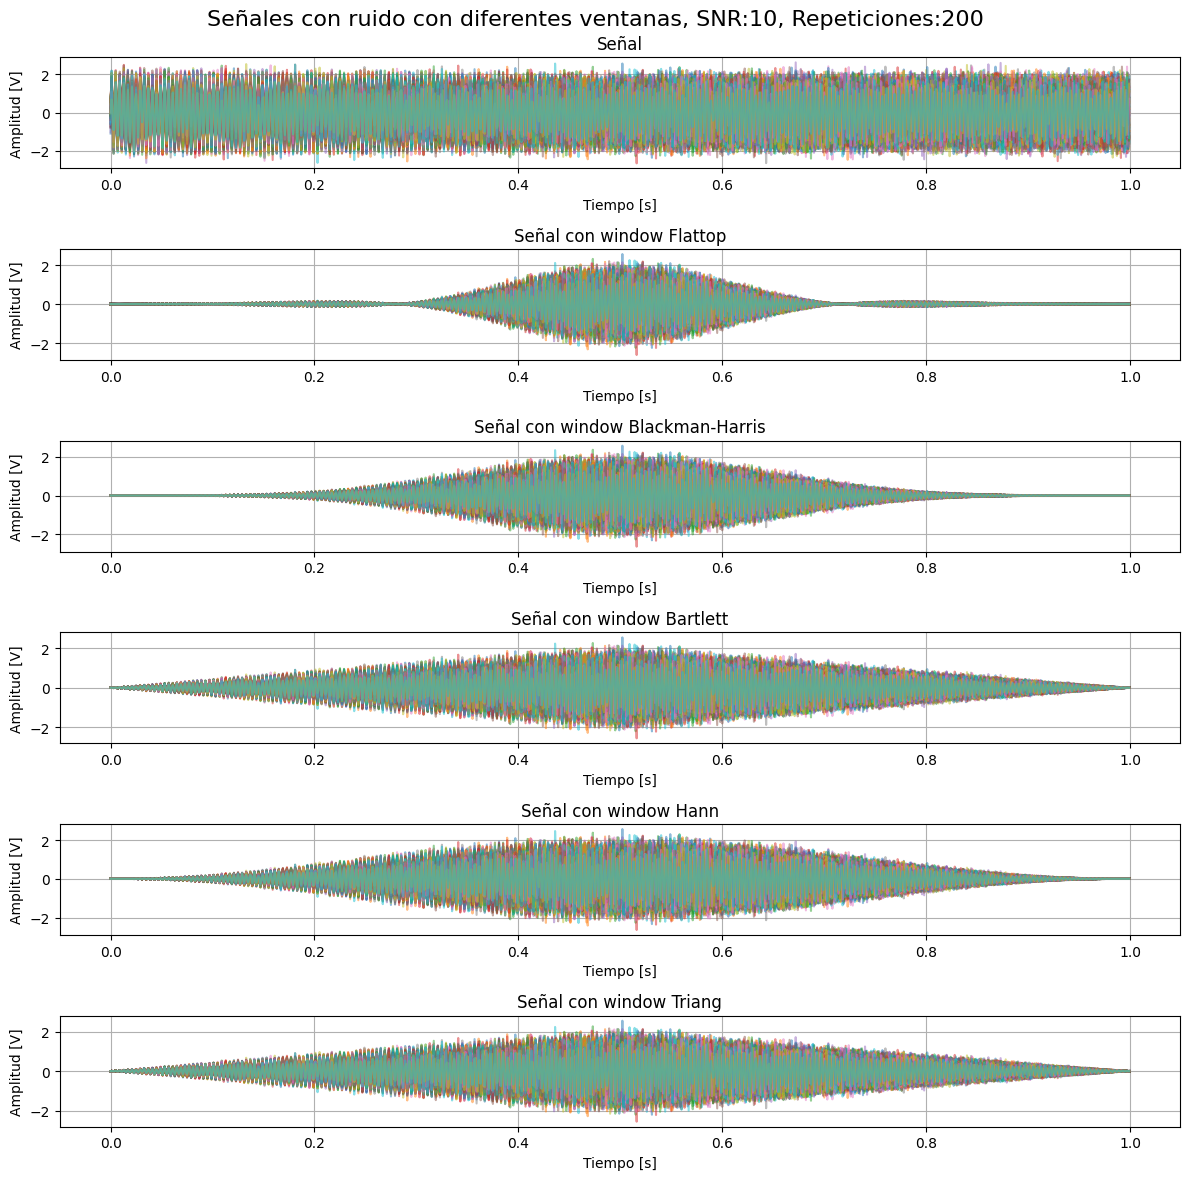

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(w,1,1)
plot_temp(xk,t, repes, 'Señal', 'Tiempo [s]', 'Amplitud [V]')
plt.subplot(w,1,2)
plot_temp(xk_flattop,t, repes, 'Señal con window Flattop', 'Tiempo [s]', 'Amplitud [V]')
plt.subplot(w,1,3)
plot_temp(xk_blackh,t, repes, 'Señal con window Blackman-Harris', 'Tiempo [s]', 'Amplitud [V]')
plt.subplot(w,1,4)
plot_temp(xk_barlett,t, repes, 'Señal con window Bartlett', 'Tiempo [s]', 'Amplitud [V]')
plt.subplot(w,1,5)
plot_temp(xk_han,t, repes, 'Señal con window Hann', 'Tiempo [s]', 'Amplitud [V]')
plt.subplot(w,1,6)
plot_temp(xk_triang,t, repes, 'Señal con window Triang', 'Tiempo [s]', 'Amplitud [V]')

plt.suptitle(f'Señales con ruido con diferentes ventanas, SNR:{SNR}, Repeticiones:{repes}', fontsize=16)
plt.tight_layout()
plt.show()


## Disclaimer: Ventanas ////////////////////
Me parecia una buena idea plotear la señal con el ventaneo en el dominio temporal. Se ve muy bien como las ventanas "apasiguan" los bordes. 
dato de las ventanas: Estan buenas para casos de aliasing (no es este caso) pero al "apasiguar" bordes puede disminuir la dispercion de la energia. Muestro mini ejemplo de las clases:
Se ve bien como para el caso donde la frecuencia es 1.5Hz la ventana evita la dispercion de la energia

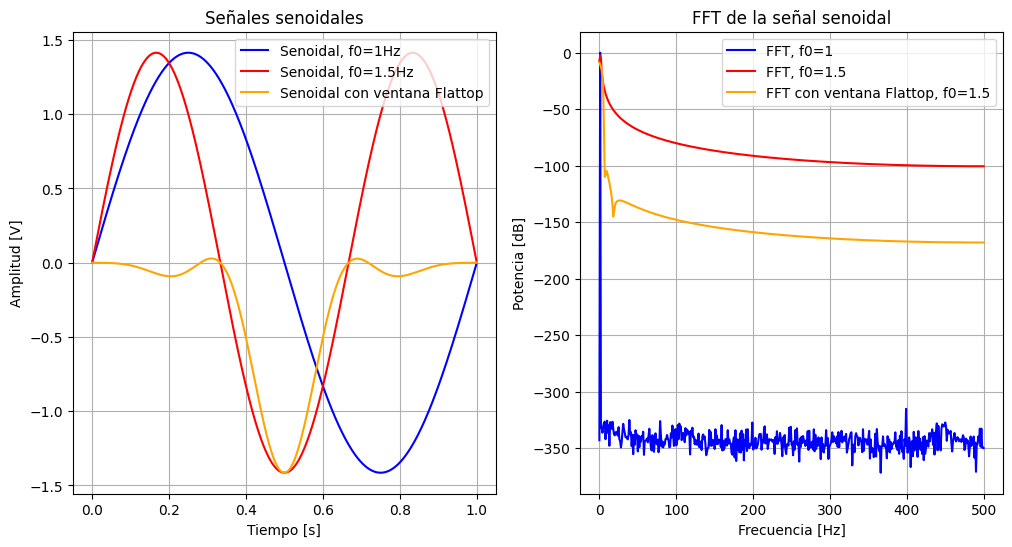

In [40]:
import Aps 
tt_pd, xx_pd = Aps.generador_sen(np.sqrt(2), 0, ff=1, ph=0, nn=N, fs=fs)
tt_pd_2, xx_pd_2 = Aps.generador_sen(np.sqrt(2), 0, ff=1.5, ph=0, nn=N, fs=fs)
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(tt_pd, xx_pd, label=f'Senoidal, f0=1Hz', color='blue')
plt.plot(tt_pd, xx_pd_2, label=f'Senoidal, f0=1.5Hz', color='red')
plt.plot(tt_pd,xx_pd_2 *signal.windows.flattop(N, sym=True), label='Senoidal con ventana Flattop', color='orange')
plt.title('Señales senoidales')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
ffx = np.linspace(0, (N-1)*df, N)   #eje frecuencial
bfrec = ffx <= fs/2 #es un booleano, m quedo solo con la mitad (redundante ambos lados del espectro)

ft_As = 1/N * np.fft.fft(xx_pd_2)
ft_As_1 = 1/N * np.fft.fft(xx_pd)
ft_As_w = 1/N * np.fft.fft(xx_pd_2 * signal.windows.flattop(N, sym=True))

plt.plot(ffx[bfrec], 10 * np.log10(2 * np.abs(ft_As_1[bfrec])**2), label='FFT, f0=1', color='blue')
plt.plot(ffx[bfrec], 10 * np.log10(2 * np.abs(ft_As[bfrec])**2), label='FFT, f0=1.5', color='red')
plt.plot(ffx[bfrec], 10 * np.log10(2 * np.abs(ft_As_w[bfrec])**2), label='FFT con ventana Flattop, f0=1.5', color='orange')
plt.title('FFT de la señal senoidal')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia [dB]')
plt.legend()
plt.grid()
plt.show()

# /////////////////////////////////////////// Fin del disclaimer

## Ploteo espectros

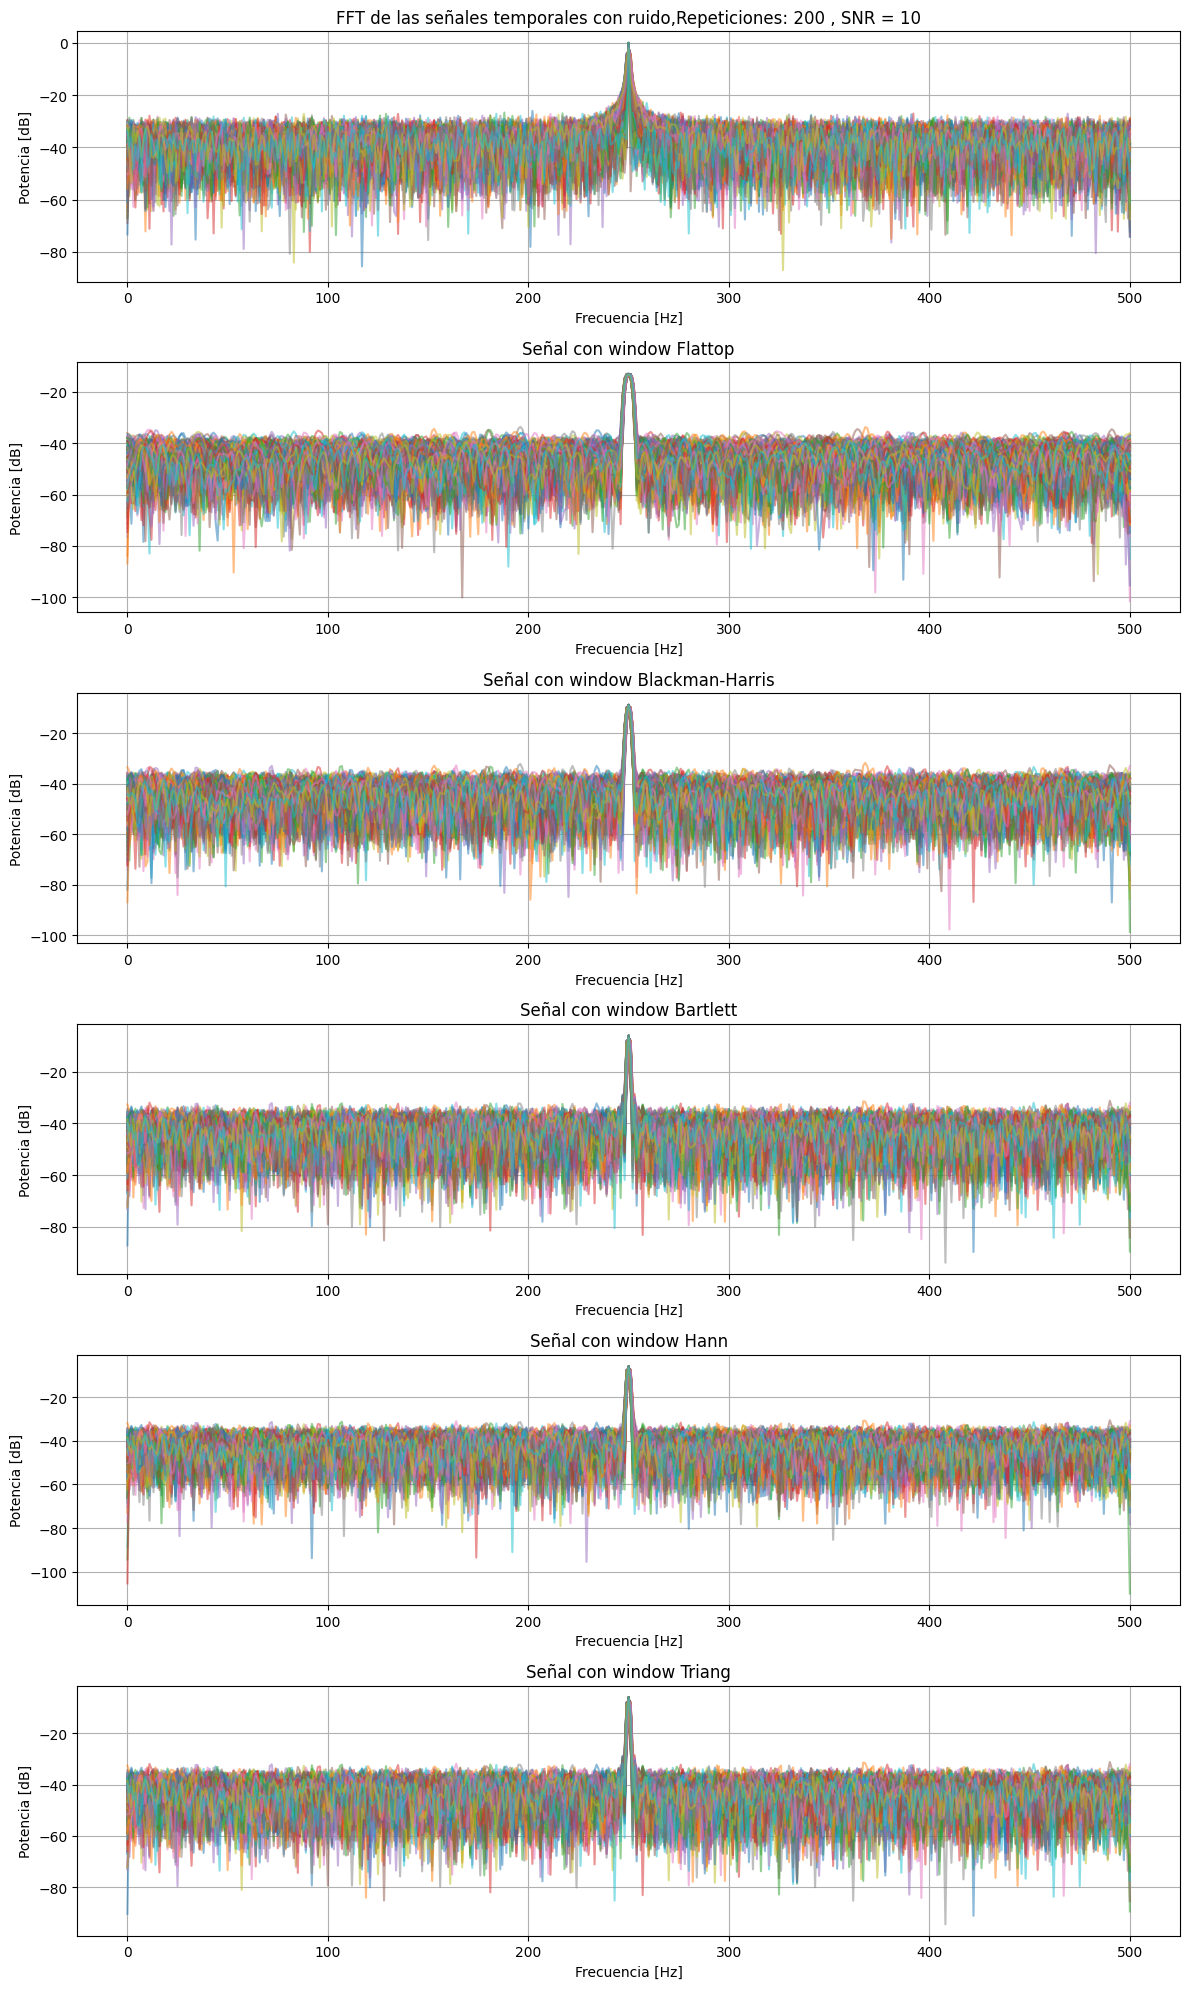

In [10]:
plt.figure(figsize=(12, 20))
plt.subplot(w,1,1)
plot_freq(Xk_fft, ffx, repes, bfrec, f'FFT de las señales temporales con ruido,Repeticiones: {repes} , SNR = {SNR}', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.subplot(w,1,2)
plot_freq(Xk_flattop_fft, ffx, repes, bfrec, 'Señal con window Flattop', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.subplot(w,1,3)
plot_freq(Xk_blackh_fft, ffx, repes, bfrec, 'Señal con window Blackman-Harris', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.subplot(w,1,4)
plot_freq(Xk_barlett_fft, ffx, repes, bfrec, 'Señal con window Bartlett', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.subplot(w,1,5)
plot_freq(Xk_han_fft, ffx, repes, bfrec, 'Señal con window Hann', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.subplot(w,1,6)
plot_freq(Xk_triang_fft, ffx, repes, bfrec, 'Señal con window Triang', 'Frecuencia [Hz]', 'Potencia [dB]')

plt.tight_layout()
plt.show()


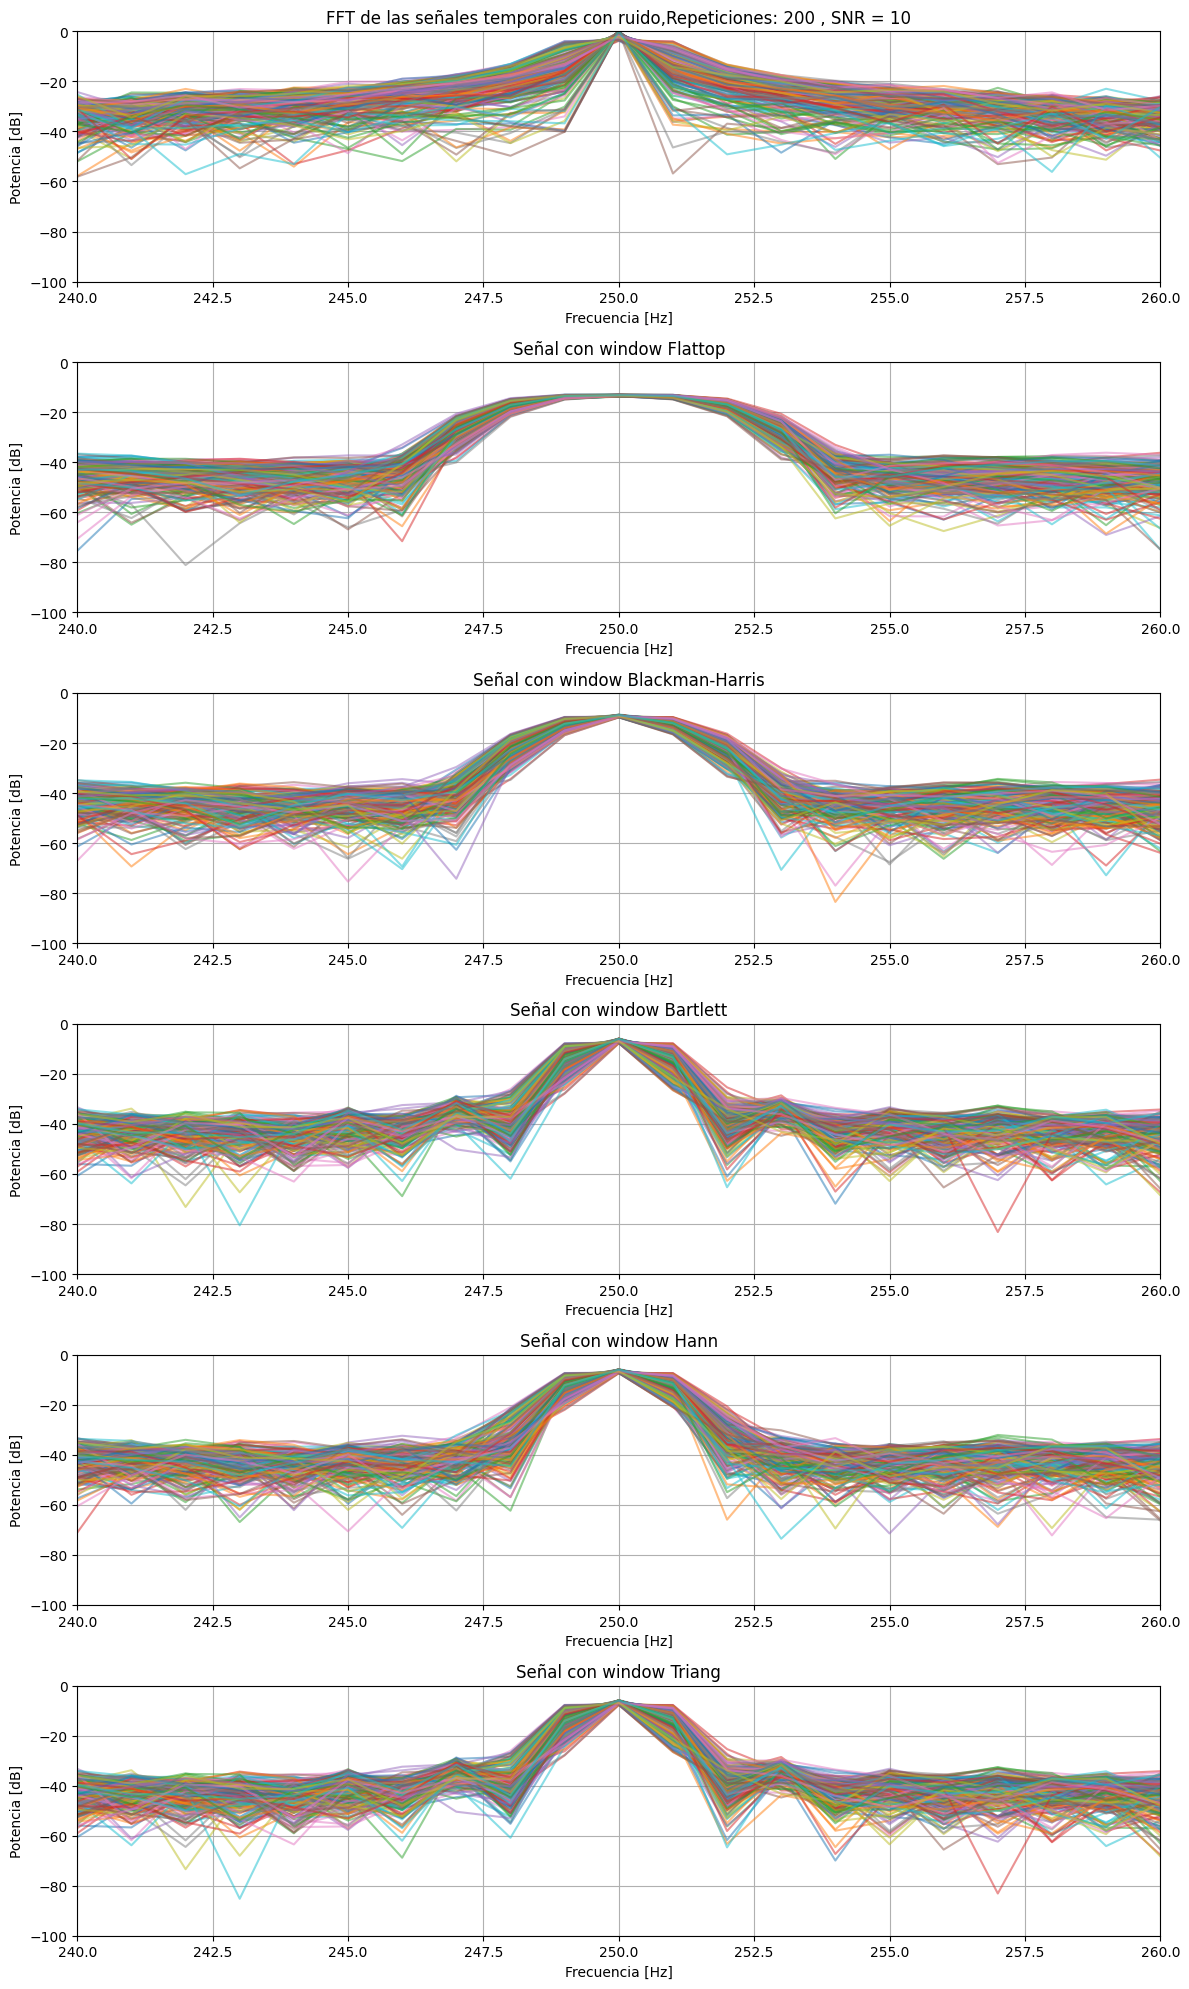

In [11]:
plt.figure(figsize=(12, 20))

plt.subplot(w,1,1)
plot_freq(Xk_fft, ffx, repes, bfrec, f'FFT de las señales temporales con ruido,Repeticiones: {repes} , SNR = {SNR}', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.xlim(fs/4 - 10, fs/4 + 10)
plt.ylim(-100, 0)

plt.subplot(w,1,2)
plot_freq(Xk_flattop_fft, ffx, repes, bfrec, 'Señal con window Flattop', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.xlim(fs/4 - 10, fs/4 + 10)
plt.ylim(-100, 0)

plt.subplot(w,1,3)
plot_freq(Xk_blackh_fft, ffx, repes, bfrec, 'Señal con window Blackman-Harris', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.xlim(fs/4 - 10, fs/4 + 10)
plt.ylim(-100, 0)

plt.subplot(w,1,4)
plot_freq(Xk_barlett_fft, ffx, repes, bfrec, 'Señal con window Bartlett', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.xlim(fs/4 - 10, fs/4 + 10)
plt.ylim(-100, 0)

plt.subplot(w,1,5)
plot_freq(Xk_han_fft, ffx, repes, bfrec, 'Señal con window Hann', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.xlim(fs/4 - 10, fs/4 + 10)
plt.ylim(-100, 0)

plt.subplot(w,1,6)
plot_freq(Xk_triang_fft, ffx, repes, bfrec, 'Señal con window Triang', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.xlim(fs/4 - 10, fs/4 + 10)
plt.ylim(-100, 0)

plt.tight_layout()
plt.show()

## Estimador a

In [12]:
f0 = fs/4
a_implicita, a_implicita_media, a_implicita_var = estimador_a(Xk_fft, f0)
a_flattop, a_flattop_media, a_flattop_var = estimador_a(Xk_flattop_fft, f0)
a_blackh, a_blackh_media, a_blackh_var = estimador_a(Xk_blackh_fft, f0)
a_barlett, a_barlett_media, a_barlett_var = estimador_a(Xk_barlett_fft, f0)
a_han, a_han_media, a_han_var = estimador_a(Xk_han_fft, f0)
a_triang, a_triang_media, a_triang_var = estimador_a(Xk_triang_fft, f0)


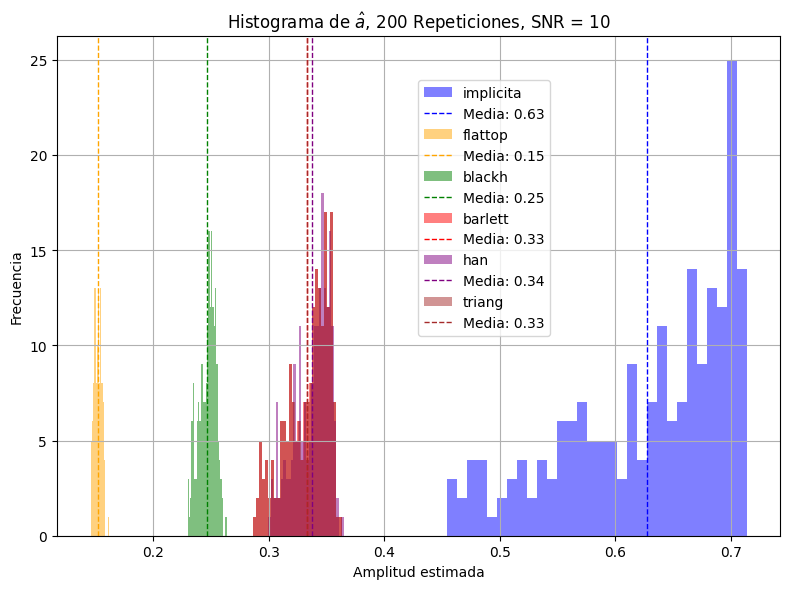

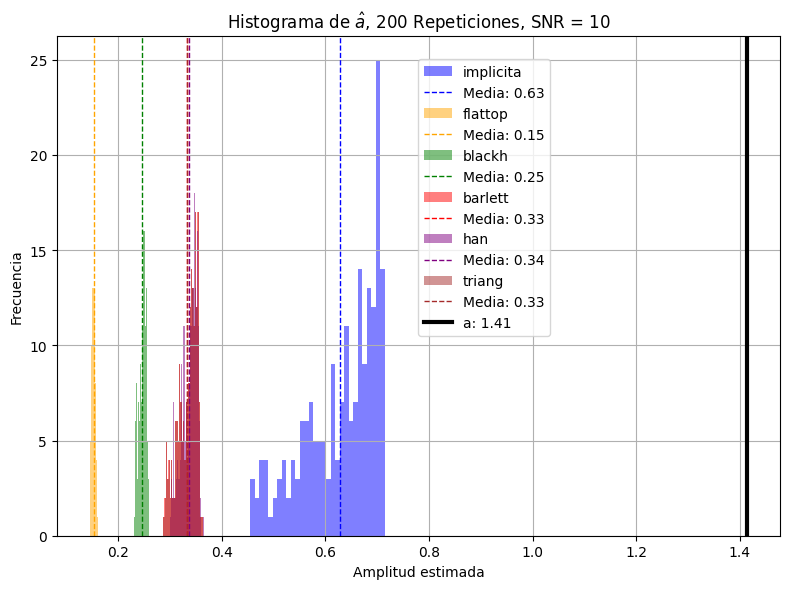

In [13]:
for i in range (2):
    plt.figure(figsize=(8, 6))
    plt.hist(a_implicita,color = 'blue', bins=30, alpha=0.5, label='implicita')
    plt.axvline(a_implicita_media, color='blue', linestyle='dashed', linewidth=1, label=f'Media: {a_implicita_media:.2f}')
    plt.hist(a_flattop, color='orange', bins=30, alpha=0.5, label='flattop')
    plt.axvline(a_flattop_media, color='orange', linestyle='dashed', linewidth=1, label=f'Media: {a_flattop_media:.2f}')
    plt.hist(a_blackh, color='green', bins=30, alpha=0.5, label='blackh')
    plt.axvline(a_blackh_media, color='green', linestyle='dashed', linewidth=1, label=f'Media: {a_blackh_media:.2f}')
    plt.hist(a_barlett, color='red', bins=30, alpha=0.5, label='barlett')
    plt.axvline(a_barlett_media, color='red', linestyle='dashed', linewidth=1, label=f'Media: {a_barlett_media:.2f}')
    plt.hist(a_han, color='purple', bins=30, alpha=0.5, label='han')
    plt.axvline(a_han_media, color='purple', linestyle='dashed', linewidth=1, label=f'Media: {a_han_media:.2f}')
    plt.hist(a_triang, color='brown', bins=30, alpha=0.5, label='triang')
    plt.axvline(a_triang_media, color='brown', linestyle='dashed', linewidth=1, label=f'Media: {a_triang_media:.2f}')
    if i == 1:
        plt.axvline(a1, color='black', linestyle='-', linewidth=3, label=f'a: {a1:.2f}')
    
    plt.title(f'Histograma de $\\hat{{a}}$, {repes} Repeticiones, SNR = {SNR}')
    plt.xlabel("Amplitud estimada")
    plt.ylabel("Frecuencia")
    plt.legend(loc = (0.5,0.4))
    plt.grid()
    plt.tight_layout()
    plt.show()


In [14]:
#sesgos
sesgo_implicita = a_implicita_media - a1
sesgo_flattop = a_flattop_media - a1
sesgo_blackh = a_blackh_media - a1
sesgo_barlett = a_barlett_media - a1
sesgo_han = a_han_media - a1
sesgo_triang = a_triang_media - a1
print(f'Sesgo implicita: {sesgo_implicita:.2f}')
print(f'Sesgo flattop: {sesgo_flattop:.2f}')
print(f'Sesgo blackh: {sesgo_blackh:.2f}')
print(f'Sesgo barlett: {sesgo_barlett:.2f}')
print(f'Sesgo han: {sesgo_han:.2f}')
print(f'Sesgo triang: {sesgo_triang:.2f}')
# varianzas

print(f'Varianza implicita: {a_implicita_var:.8f}')
print(f'Varianza flattop: {a_flattop_var:.8f}')
print(f'Varianza blackh: {a_blackh_var:.8f}')
print(f'Varianza barlett: {a_barlett_var:.8f}')
print(f'Varianza han: {a_han_var:.8f}')
print(f'Varianza triang: {a_triang_var:.8f}')



Sesgo implicita: -0.79
Sesgo flattop: -1.26
Sesgo blackh: -1.17
Sesgo barlett: -1.08
Sesgo han: -1.08
Sesgo triang: -1.08
Varianza implicita: 0.00497502
Varianza flattop: 0.00001007
Varianza blackh: 0.00005110
Varianza barlett: 0.00034153
Varianza han: 0.00022475
Varianza triang: 0.00034343


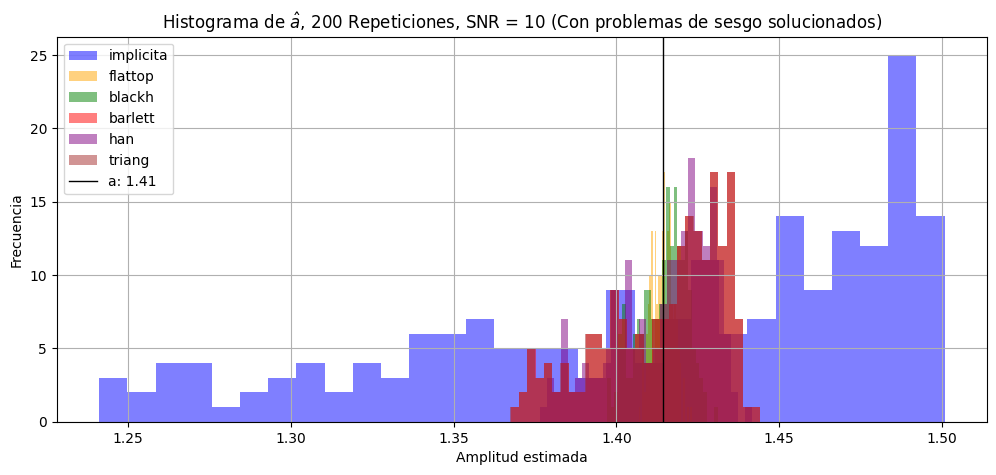

In [15]:
a_implicita_c = a_implicita - sesgo_implicita
a_flattop_c = a_flattop - sesgo_flattop
a_blackh_c = a_blackh - sesgo_blackh
a_barlett_c = a_barlett - sesgo_barlett
a_han_c = a_han - sesgo_han
a_triang_c = a_triang - sesgo_triang

plt.figure(figsize=(12, 5))
plt.hist(a_implicita_c,color = 'blue', bins=30, alpha=0.5, label='implicita')
plt.hist(a_flattop_c, color='orange', bins=30, alpha=0.5, label='flattop')
plt.hist(a_blackh_c, color='green', bins=30, alpha=0.5, label='blackh')
plt.hist(a_barlett_c, color='red', bins=30, alpha=0.5, label='barlett')
plt.hist(a_han_c, color='purple', bins=30, alpha=0.5, label='han')
plt.hist(a_triang_c, color='brown', bins=30, alpha=0.5, label='triang')
plt.axvline(a1, color='black', linestyle='-', linewidth=1, label=f'a: {a1:.2f}')
plt.title(f'Histograma de $\\hat{{a}}$, {repes} Repeticiones, SNR = {SNR} (Con problemas de sesgo solucionados)')
plt.xlabel("Amplitud estimada")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid()
plt.show()

[]

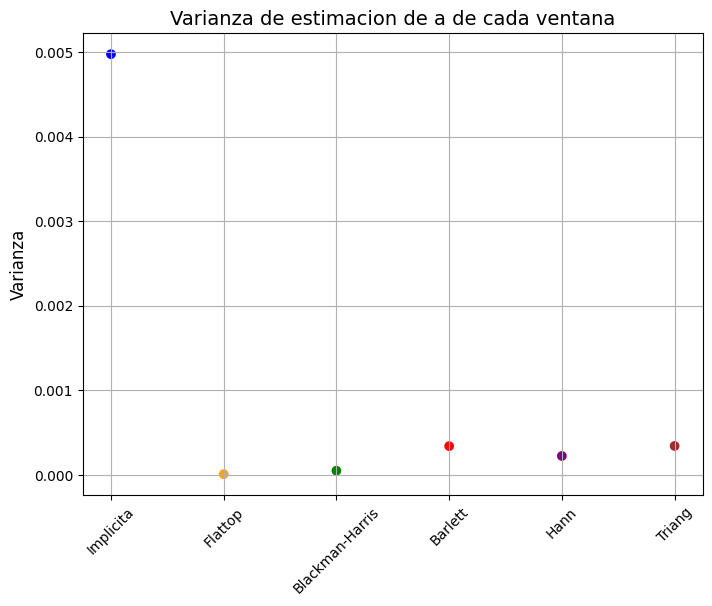

In [16]:
plt.figure(figsize=(8, 6))
varianzas = [a_implicita_var, a_flattop_var, a_blackh_var, a_barlett_var, a_han_var, a_triang_var]
labels = ['Implicita', 'Flattop', 'Blackman-Harris', 'Barlett', 'Hann', 'Triang']
plt.scatter(range(len(varianzas)), varianzas, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xticks(range(len(varianzas)), labels, rotation=45, fontsize=10)
plt.title('Varianza de estimacion de a de cada ventana', fontsize=14)
plt.ylabel('Varianza', fontsize=12)
plt.grid(True)
plt.plot()

### Conclusiones
Como bien mostre, el sesgo tiene solucion. Pero la varianza no. 
Por lo tanto voy a elejir a mi mejor estimador a partir de la varianza.
El mejor estimador de la amplitud es **Flattop** siguiendole **Blackman-Harrys**

## Estimador w

In [17]:
w_implicita, w_implicita_media, w_implicita_var = estimador_w(Xk_fft, bfrec, df)
w_flattop, w_flattop_media, w_flattop_var = estimador_w(Xk_flattop_fft, bfrec, df)
w_blackh, w_blackh_media, w_blackh_var = estimador_w(Xk_blackh_fft, bfrec, df)
w_barlett, w_barlett_media, w_barlett_var = estimador_w(Xk_barlett_fft, bfrec, df)
w_han, w_han_media, w_han_var = estimador_w(Xk_han_fft, bfrec, df)
w_triang, w_triang_media, w_triang_var = estimador_w(Xk_triang_fft, bfrec, df)


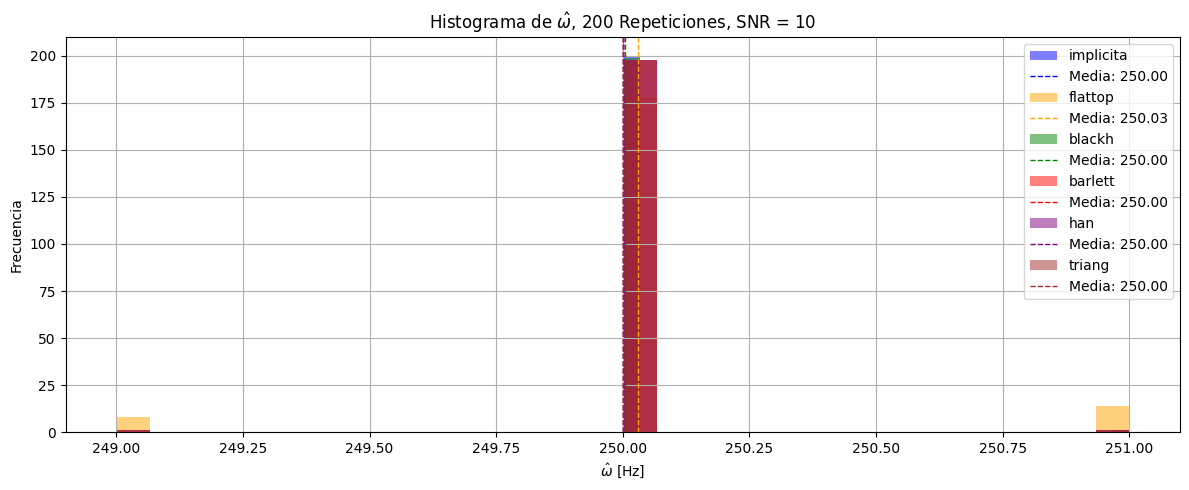

In [18]:
plt.figure(figsize=(12, 5))
plt.hist(w_implicita,color = 'blue', bins=30, alpha=0.5, label='implicita')
plt.axvline(w_implicita_media, color='blue', linestyle='dashed', linewidth=1, label=f'Media: {w_implicita_media:.2f}')
plt.hist(w_flattop, color='orange', bins=30, alpha=0.5, label='flattop')
plt.axvline(w_flattop_media, color='orange', linestyle='dashed', linewidth=1, label=f'Media: {w_flattop_media:.2f}')
plt.hist(w_blackh, color='green', bins=30, alpha=0.5, label='blackh')
plt.axvline(w_blackh_media, color='green', linestyle='dashed', linewidth=1, label=f'Media: {w_blackh_media:.2f}')
plt.hist(w_barlett, color='red', bins=30, alpha=0.5, label='barlett')
plt.axvline(w_barlett_media, color='red', linestyle='dashed', linewidth=1, label=f'Media: {w_barlett_media:.2f}')
plt.hist(w_han, color='purple', bins=30, alpha=0.5, label='han')
plt.axvline(w_han_media, color='purple', linestyle='dashed', linewidth=1, label=f'Media: {w_han_media:.2f}')
plt.hist(w_triang, color='brown', bins=30, alpha=0.5, label='triang')
plt.axvline(w_triang_media, color='brown', linestyle='dashed', linewidth=1, label=f'Media: {w_triang_media:.2f}')

plt.legend()
plt.xlabel("$\\hat{{\omega}}$ [Hz]")
plt.ylabel("Frecuencia")
plt.title(f'Histograma de $\\hat{{\omega}}$, {repes} Repeticiones, SNR = {SNR}')
plt.grid()
plt.tight_layout()
plt.show()

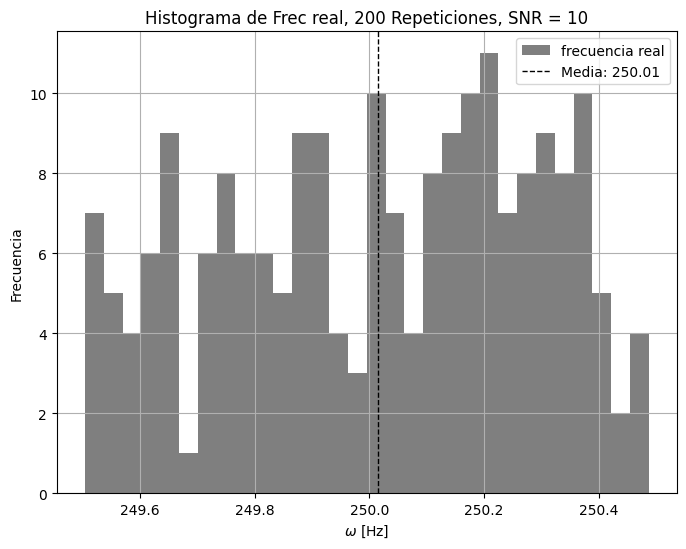

In [19]:
plt.figure(figsize=(8, 6))

plt.hist(np.ravel(ff),color = 'black', bins=30, alpha=0.5, label='frecuencia real')
plt.axvline(ff.mean(), color='black', linestyle='dashed', linewidth=1, label=f'Media: {ff.mean():.2f}')

plt.xlabel("$\omega$ [Hz]")
plt.ylabel("Frecuencia")
plt.title(f'Histograma de Frec real, {repes} Repeticiones, SNR = {SNR}')
plt.grid()
plt.legend()
plt.show()

De la consigna interpreto que la frecuencia que quiero estimar es la que tiene sumada el ruido. No la constante. Por lo tanto tengo un vector de "Valores reales de frecuencia", decidi calcularle la media y trabajar a este valor como el "Valor real" a apartir del cual voy a calcular los sesgos. 

In [20]:
#sesgos de w
sesgo_w_implicita = w_implicita_media - ff.mean()
sesgo_w_flattop = w_flattop_media - ff.mean()
sesgo_w_blackh = w_blackh_media - ff.mean()
sesgo_w_barlett = w_barlett_media - ff.mean()
sesgo_w_han = w_han_media - ff.mean()
sesgo_w_triang = w_triang_media - ff.mean()
print(f'Sesgo implicita: {sesgo_w_implicita:.2f}')
print(f'Sesgo flattop: {sesgo_w_flattop:.2f}')  
print(f'Sesgo blackh: {sesgo_w_blackh:.2f}')
print(f'Sesgo barlett: {sesgo_w_barlett:.2f}')
print(f'Sesgo han: {sesgo_w_han:.2f}')
print(f'Sesgo triang: {sesgo_w_triang:.2f}')
# varianzas de w
print(f'Varianza implicita: {w_implicita_var:.8f}')
print(f'Varianza flattop: {w_flattop_var:.8f}')
print(f'Varianza blackh: {w_blackh_var:.8f}')
print(f'Varianza barlett: {w_barlett_var:.8f}')
print(f'Varianza han: {w_han_var:.8f}')
print(f'Varianza triang: {w_triang_var:.8f}')


Sesgo implicita: -0.01
Sesgo flattop: 0.02
Sesgo blackh: -0.01
Sesgo barlett: -0.01
Sesgo han: -0.01
Sesgo triang: -0.01
Varianza implicita: 0.00000000
Varianza flattop: 0.10910000
Varianza blackh: 0.00497500
Varianza barlett: 0.01000000
Varianza han: 0.01000000
Varianza triang: 0.01000000


[]

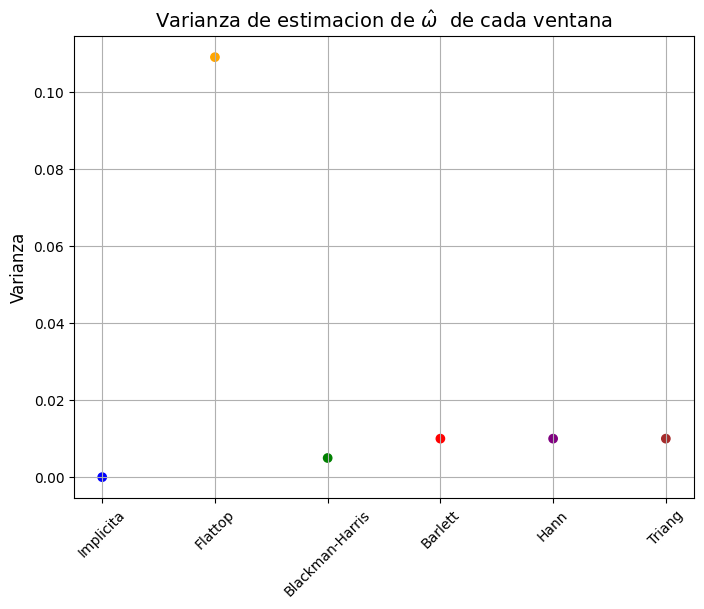

In [21]:
plt.figure(figsize=(8, 6))
varianzas = [w_implicita_var, w_flattop_var, w_blackh_var, w_barlett_var, w_han_var, w_triang_var]
labels = ['Implicita', 'Flattop', 'Blackman-Harris', 'Barlett', 'Hann', 'Triang']
plt.scatter(range(len(varianzas)), varianzas, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xticks(range(len(varianzas)), labels, rotation=45, fontsize=10)
plt.title('Varianza de estimacion de $\\hat{{\omega}}$  de cada ventana', fontsize=14)
plt.ylabel('Varianza', fontsize=12)
plt.grid(True)
plt.plot()

Si bien la implicita es la que presenta una menor varianza, no es conveniente estimar la frecuencia cuando tengo una resolucion espectral mala. Voy a mejorar la resolucion espectral (haciendo cero-padding). 

## Otro discaimer: Cero Padding //////////////////////////

Ventajas: 
- la FFT genera mas puntos entre las frecuencias originales lo que suaviza el espectro (El cero-padding equivale a convolucionar el espectro original con una sinc. Esto genera una curva suave entre los bins originales.)
- Los ceros no agregan informacion nueva, solo permiten distinguir componentes cercanos en frecuencia


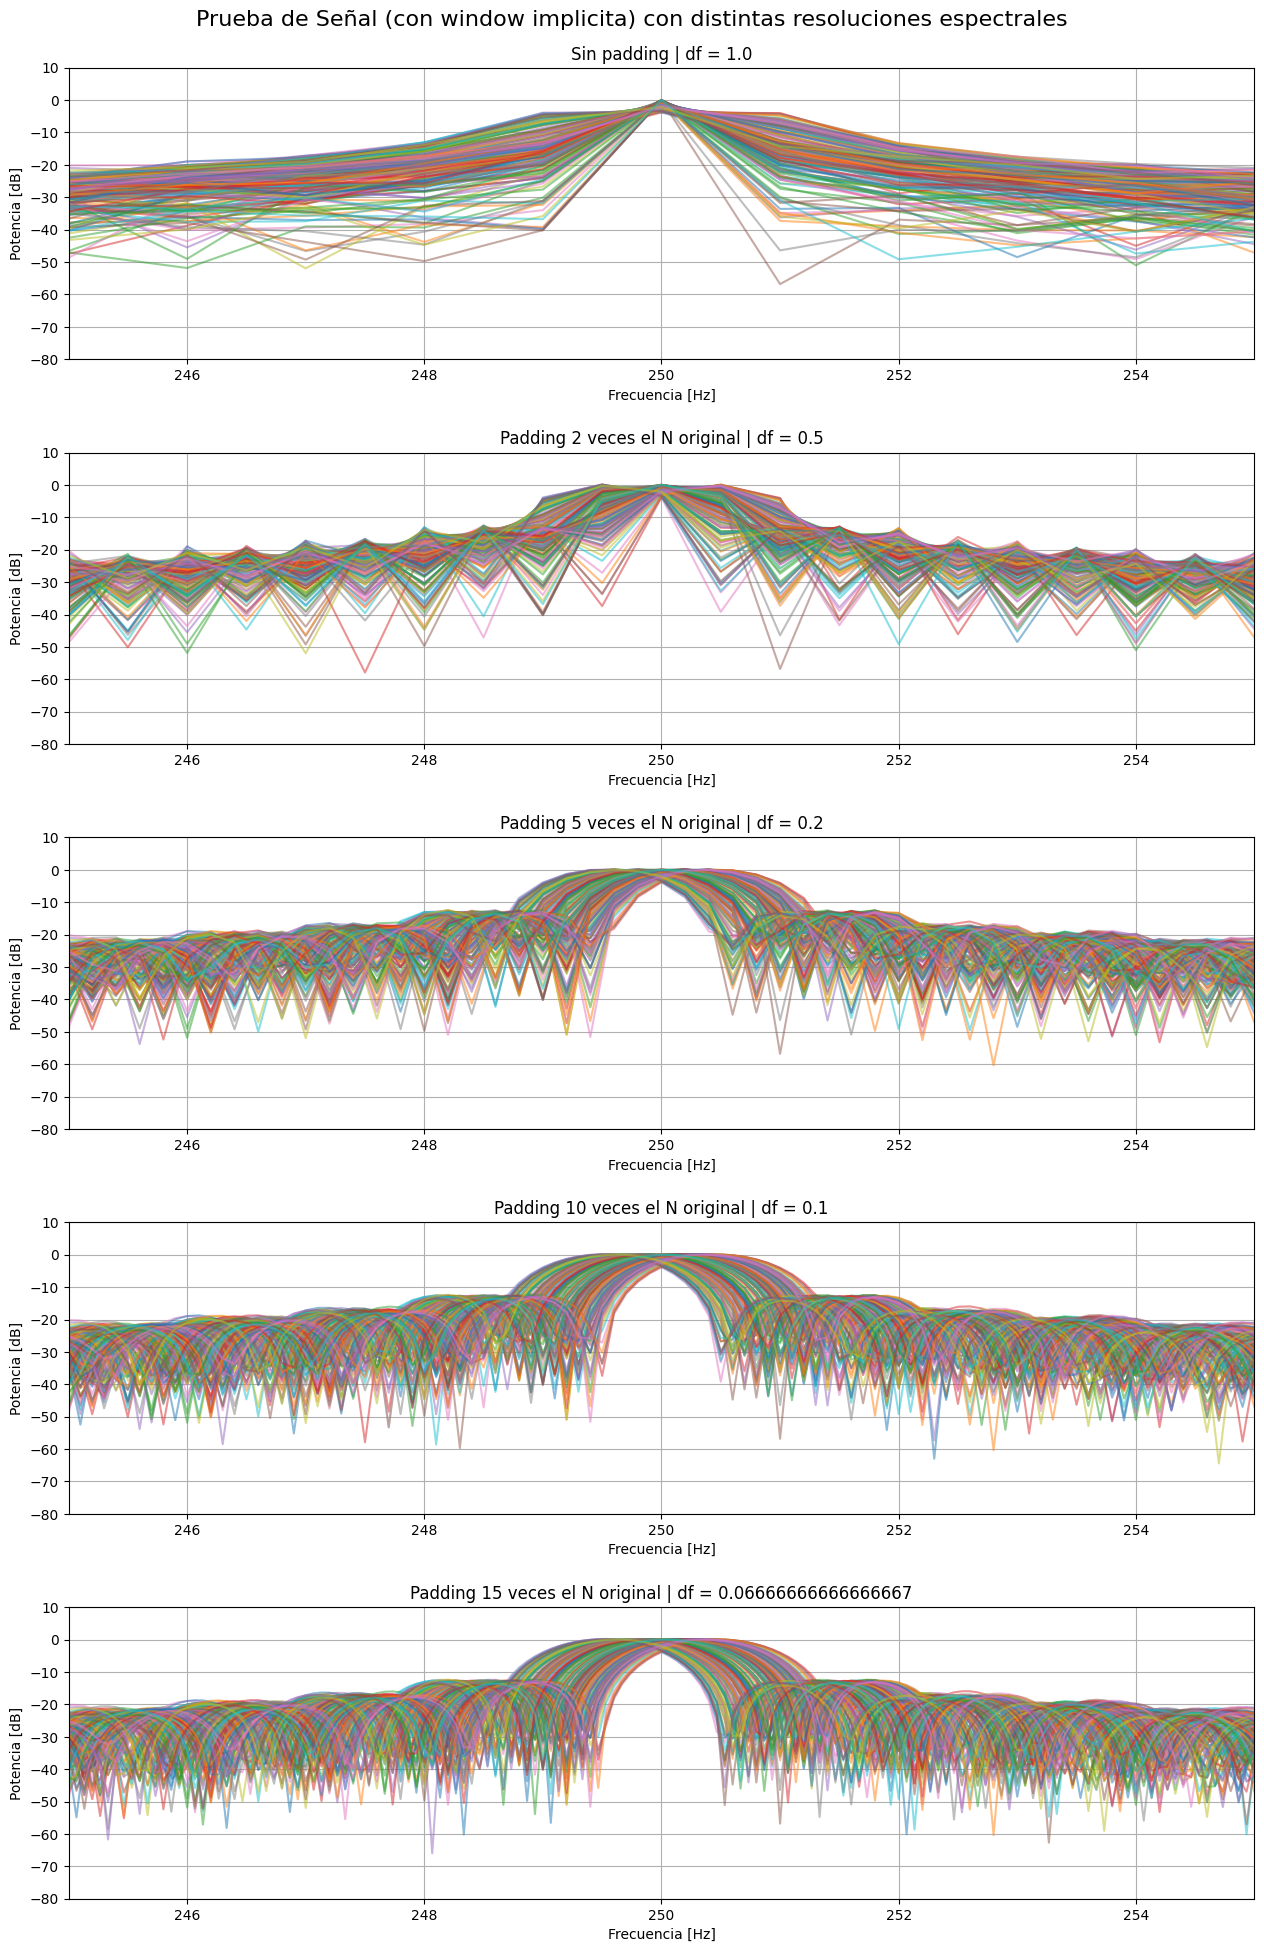

In [ ]:
# La resolucion espectral es mala, voy a hacer un padding. Voy a probar con x veces el N original (N=1000) a ver como queda
N_pad_1 = N * 2
N_pad_2 = N * 5
N_pad_3 = N * 10
N_pad_4 = N * 15

Xk_fft_pad, ffx_pad, bfrec_pad, df_pad = gen_fft(xk,fs=fs, cte=N_pad_1)
Xk_fft_pad_2, ffx_pad_2, bfrec_pad_2, df_pad_2 = gen_fft(xk,fs=fs, cte=N_pad_2)
Xk_fft_pad_3, ffx_pad_3, bfrec_pad_3, df_pad_3 = gen_fft(xk,fs=fs, cte=N_pad_3)
Xk_fft_pad_4, ffx_pad_4, bfrec_pad_4, df_pad_4 = gen_fft(xk,fs=fs, cte=N_pad_4)

plt.figure(figsize=(13, 20))
plt.subplot(5,1,1) #sin padding
plot_freq(Xk_fft, ffx, repes, bfrec, f'Sin padding | df = {df}', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.xlim(fs/4 - 5, fs/4 + 5)
plt.ylim(-80, 10)
plt.subplot(5,1,2) #padding 2 veces el N original
plot_freq(Xk_fft_pad, ffx_pad, repes, bfrec_pad, f'Padding 2 veces el N original | df = {df_pad}', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.xlim(fs/4 - 5, fs/4 + 5)
plt.ylim(-80, 10)
plt.subplot(5,1,3) #padding 5 veces el N original
plot_freq(Xk_fft_pad_2, ffx_pad_2, repes, bfrec_pad_2, f'Padding 5 veces el N original | df = {df_pad_2}', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.xlim(fs/4 - 5, fs/4 + 5)
plt.ylim(-80, 10)
plt.subplot(5,1,4) #padding 15 veces el N original
plot_freq(Xk_fft_pad_3, ffx_pad_3, repes, bfrec_pad_3, f'Padding 10 veces el N original | df = {df_pad_3}', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.xlim(fs/4 - 5, fs/4 + 5)
plt.ylim(-80, 10)
plt.subplot(5,1,5) #padding 30 veces el N original
plot_freq(Xk_fft_pad_4, ffx_pad_4, repes, bfrec_pad_4, f'Padding 15 veces el N original | df = {df_pad_4}', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.xlim(fs/4 - 5, fs/4 + 5)
plt.ylim(-80, 10)

plt.suptitle('Prueba de Señal (con window implicita) con distintas resoluciones espectrales', fontsize=16)
plt.tight_layout( pad=2.0)
plt.show()



Se ve re bien como al pasar de df=1 a df=0.5 ahora 2 bins cada 1 "antiguo" bin. Antes de 250 a 252 tenia 3 bins. ahora tengo 5. (incluyendo bordes)

dato: interpola con una sync

Me voy a quedar con el padding tal que ahora tengo 10*N puntos. Osea que paso de tener N=1000 muestras de cada señal, relleno con ceros tal que obtengo 10*N 

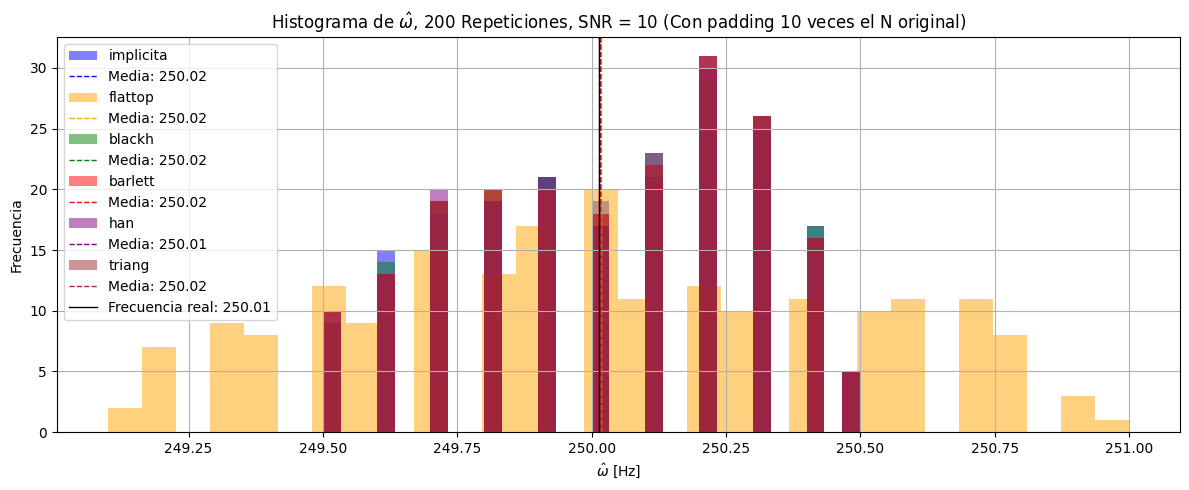

In [ ]:

Xk_fft_pad_implicita, ffx_pad_implicita, bfrec_pad_implicita, df_pad_implicita = gen_fft(xk,fs=fs, cte=N_pad_3)
Xk_flattop_fft_pad, ffx_pad_flattop, bfrec_pad_flattop, df_pad_flattop = gen_fft(xk_flattop,fs=fs, cte=N_pad_3)
Xk_blackh_fft_pad, ffx_pad_blackh, bfrec_pad_blackh, df_pad_blackh = gen_fft(xk_blackh,fs=fs, cte=N_pad_3)
Xk_barlett_fft_pad, ffx_pad_barlett, bfrec_pad_barlett, df_pad_barlett = gen_fft(xk_barlett,fs=fs, cte=N_pad_3)
Xk_han_fft_pad, ffx_pad_han, bfrec_pad_han, df_pad_han = gen_fft(xk_han,fs=fs, cte=N_pad_3)
Xk_triang_fft_pad, ffx_pad_triang, bfrec_pad_triang, df_pad_triang = gen_fft(xk_triang,fs=fs, cte=N_pad_3)

w_implicita_pad, w_implicita_pad_media, w_implicita_pad_var = estimador_w(Xk_fft_pad_implicita, bfrec_pad_implicita, df_pad_implicita)
w_flattop_pad, w_flattop_pad_media, w_flattop_pad_var = estimador_w(Xk_flattop_fft_pad, bfrec_pad_flattop, df_pad_flattop)
w_blackh_pad, w_blackh_pad_media, w_blackh_pad_var = estimador_w(Xk_blackh_fft_pad, bfrec_pad_blackh, df_pad_blackh)
w_barlett_pad, w_barlett_pad_media, w_barlett_pad_var = estimador_w(Xk_barlett_fft_pad, bfrec_pad_barlett, df_pad_barlett)
w_han_pad, w_han_pad_media, w_han_pad_var = estimador_w(Xk_han_fft_pad, bfrec_pad_han, df_pad_han)
w_triang_pad, w_triang_pad_media, w_triang_pad_var = estimador_w(Xk_triang_fft_pad, bfrec_pad_triang, df_pad_triang)

plt.figure(figsize=(12, 5))
plt.hist(w_implicita_pad,color = 'blue', bins=30, alpha=0.5, label='implicita')
plt.axvline(w_implicita_pad_media, color='blue', linestyle='dashed', linewidth=1, label=f'Media: {w_implicita_pad_media:.2f}')
plt.hist(w_flattop_pad, color='orange', bins=30, alpha=0.5, label='flattop')
plt.axvline(w_flattop_pad_media, color='orange', linestyle='dashed', linewidth=1, label=f'Media: {w_flattop_pad_media:.2f}')
plt.hist(w_blackh_pad, color='green', bins=30, alpha=0.5, label='blackh')
plt.axvline(w_blackh_pad_media, color='green', linestyle='dashed', linewidth=1, label=f'Media: {w_blackh_pad_media:.2f}')
plt.hist(w_barlett_pad, color='red', bins=30, alpha=0.5, label='barlett')
plt.axvline(w_barlett_pad_media, color='red', linestyle='dashed', linewidth=1, label=f'Media: {w_barlett_pad_media:.2f}')
plt.hist(w_han_pad, color='purple', bins=30, alpha=0.5, label='han')
plt.axvline(w_han_pad_media, color='purple', linestyle='dashed', linewidth=1, label=f'Media: {w_han_pad_media:.2f}')
plt.hist(w_triang_pad, color='brown', bins=30, alpha=0.5, label='triang')
plt.axvline(w_triang_pad_media, color='brown', linestyle='dashed', linewidth=1, label=f'Media: {w_triang_pad_media:.2f}')

plt.axvline(ff.mean(), color='black', linestyle='-', linewidth=1, label=f'Frecuencia real: {ff.mean():.2f}')
plt.legend()
plt.xlabel("$\\hat{{\omega}}$ [Hz]")
plt.ylabel("Frecuencia")
plt.title(f'Histograma de $\\hat{{\omega}}$, {repes} Repeticiones, SNR = {SNR} (Con padding 10 veces el N original)')
plt.grid()
plt.tight_layout()
plt.show()


In [42]:
sesgo_w_pad_implicita = w_implicita_pad_media - ff.mean()
sesgo_w_pad_flattop = w_flattop_pad_media - ff.mean()
sesgo_w_pad_blackh = w_blackh_pad_media - ff.mean()
sesgo_w_pad_barlett = w_barlett_pad_media - ff.mean()
sesgo_w_pad_han = w_han_pad_media - ff.mean()
sesgo_w_pad_triang = w_triang_pad_media - ff.mean()
print(f'Sesgo implicita: {sesgo_w_pad_implicita:.5f}')
print(f'Sesgo flattop: {sesgo_w_pad_flattop:.5f}')
print(f'Sesgo blackh: {sesgo_w_pad_blackh:.5f}')
print(f'Sesgo barlett: {sesgo_w_pad_barlett:.5f}')
print(f'Sesgo han: {sesgo_w_pad_han:.5f}')
print(f'Sesgo triang: {sesgo_w_pad_triang:.5f}')

Sesgo implicita: 0.00220
Sesgo flattop: 0.00270
Sesgo blackh: 0.00220
Sesgo barlett: 0.00170
Sesgo han: 0.00020
Sesgo triang: 0.00170


Los sesgos quedaron mínimos. Considero que mis 6 estimadores son buenos. El mejor en cuanto a sesgo sería barlett.

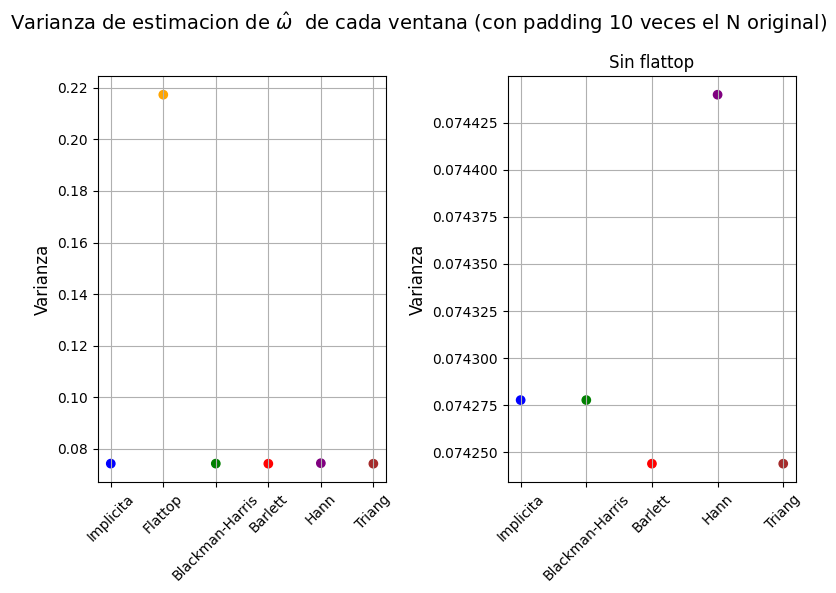

In [ ]:
# plot varincas
plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
varianzas = [w_implicita_pad_var, w_flattop_pad_var, w_blackh_pad_var, w_barlett_pad_var, w_han_pad_var, w_triang_pad_var]
labels = ['Implicita', 'Flattop', 'Blackman-Harris', 'Barlett', 'Hann', 'Triang']
plt.scatter(range(len(varianzas)), varianzas, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xticks(range(len(varianzas)), labels, rotation=45, fontsize=10)
plt.grid(True)
plt.ylabel('Varianza', fontsize=12)

plt.subplot(1,2,2)
plt.title('Sin flattop')
varianzas = [w_implicita_pad_var,  w_blackh_pad_var, w_barlett_pad_var, w_han_pad_var, w_triang_pad_var]
labels = ['Implicita', 'Blackman-Harris', 'Barlett', 'Hann', 'Triang']
plt.scatter(range(len(varianzas)), varianzas, color=['blue',  'green', 'red', 'purple', 'brown'])
plt.xticks(range(len(varianzas)), labels, rotation=45, fontsize=10)
plt.grid(True)

plt.suptitle('Varianza de estimacion de $\\hat{{\omega}}$  de cada ventana (con padding 10 veces el N original)', fontsize=14)
plt.ylabel('Varianza', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Tal y como dije para el caso de estimar $ a $, el problema del sesgo se soluciona sumandolo. (Me parece redundante volver a motrar el histograma, mas teniendo en cuenta que los sesgos dieron super chicos!)
En cuento a estimador de la frecuencia, considerando la menor varianza, el mejor es Barlett. 

## SNR = 3

SNR:  3.0000000000000004


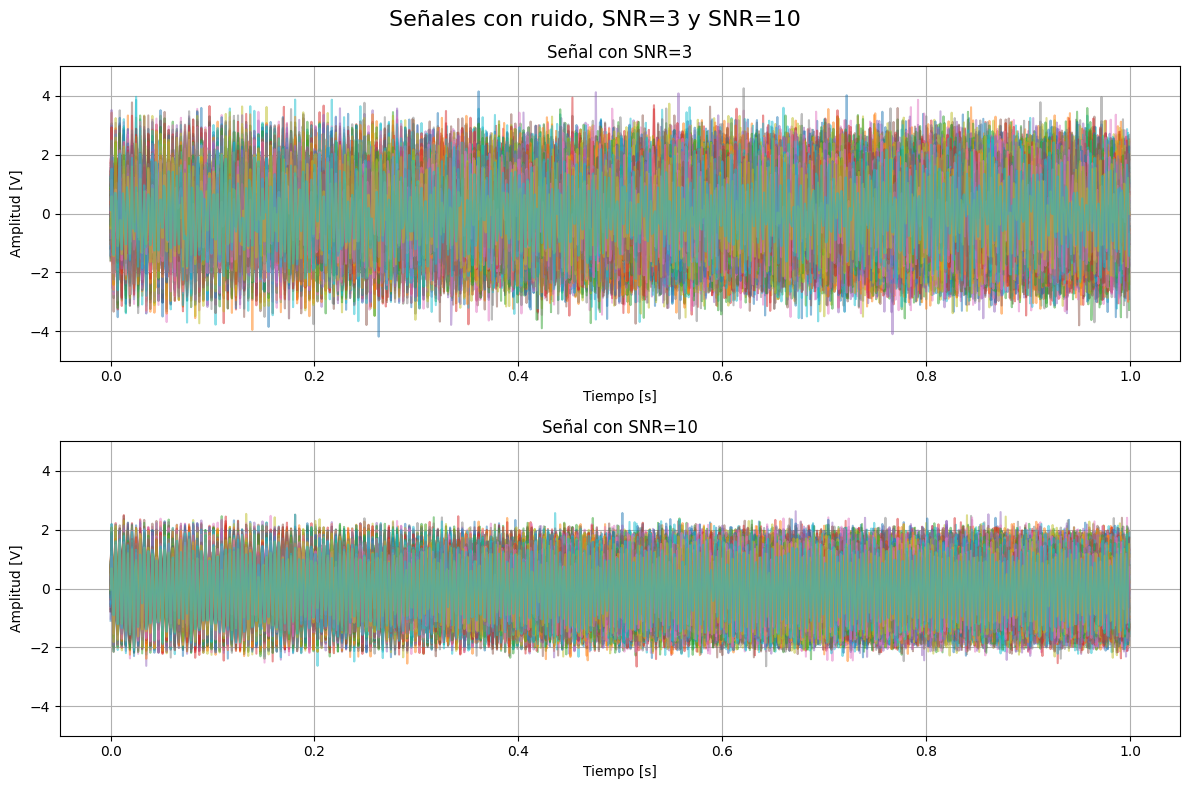

In [ ]:
SNR= 3
Pot_nn =10**(-SNR / 10) # Viene de (*)
verifico = - 10 * np.log10(Pot_nn)
print('SNR: ',verifico)
N = 1000
sigma = np.sqrt(Pot_nn)
nn_2 = np.random.normal(0, sigma, (N,repes)) #[1000 X 200
xk_2= xx + nn_2 #use la parte de xx de SNR=10 

xk_2_flattop = xk_2 * signal.windows.flattop( N , sym = True ).reshape(-1,1)  
xk_2_barlett = xk_2 * signal.windows.bartlett(N, sym=True).reshape(-1,1)

#transformo las señales
Xk_2_fft, ffx_2, bfrec_2, df_2 = gen_fft(xk_2,fs=fs)
Xk_2_flattop_fft, ffx_2, bfrec_2, df_2 = gen_fft(xk_2_flattop,fs=fs)
Xk_2_barlett_fft, ffx_2, bfrec_2, df_2 = gen_fft(xk_2_barlett,fs=fs)
Xk_2_fft_pad, ffx_2_pad, bfrec_2_pad, df_2_pad = gen_fft(xk_2,fs=fs, cte=N_pad_3)

#Ploteo señales temporales (SNR=3 VS SNR=10)
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.ylim(-5, 5)
plot_temp(xk_2,t, repes, 'Señal con SNR=3', 'Tiempo [s]', 'Amplitud [V]')
plt.subplot(2,1,2)
plt.ylim(-5, 5)
plot_temp(xk,t, repes, 'Señal con SNR=10', 'Tiempo [s]', 'Amplitud [V]')
plt.suptitle(f'Señales con ruido, SNR=3 y SNR=10', fontsize=16)
plt.tight_layout()
plt.show()

Tiene sentido ya que si SNR es menor entonces la potencia del ruido es mayor

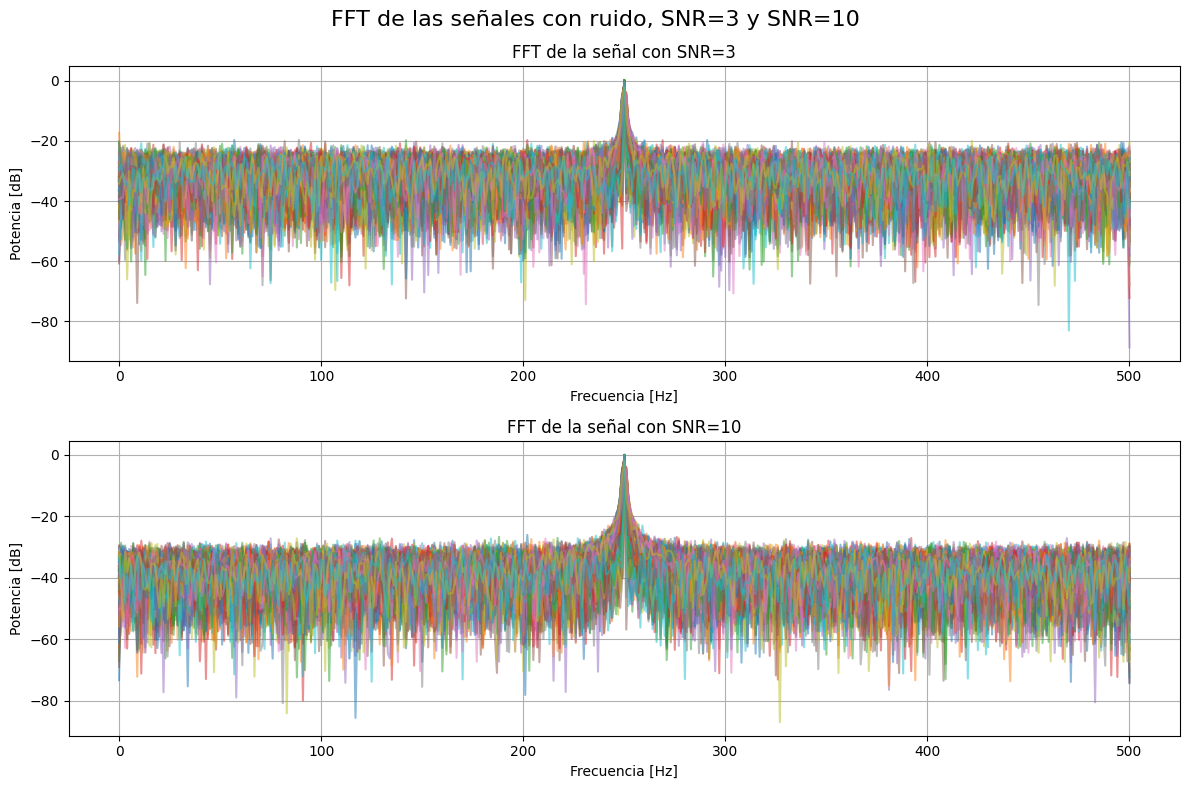

In [50]:
# ploteo FFT (SNR=3 VS SNR=10)
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)

plot_freq(Xk_2_fft, ffx_2, repes, bfrec_2, f'FFT de la señal con SNR=3', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.subplot(2,1,2)

plot_freq(Xk_fft, ffx, repes, bfrec, f'FFT de la señal con SNR=10', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.suptitle(f'FFT de las señales con ruido, SNR=3 y SNR=10', fontsize=16)
plt.tight_layout()
plt.show()


se ve perfecto como para SNR = 3 el piso de ruido aumenta en comparacion con SNR = 10

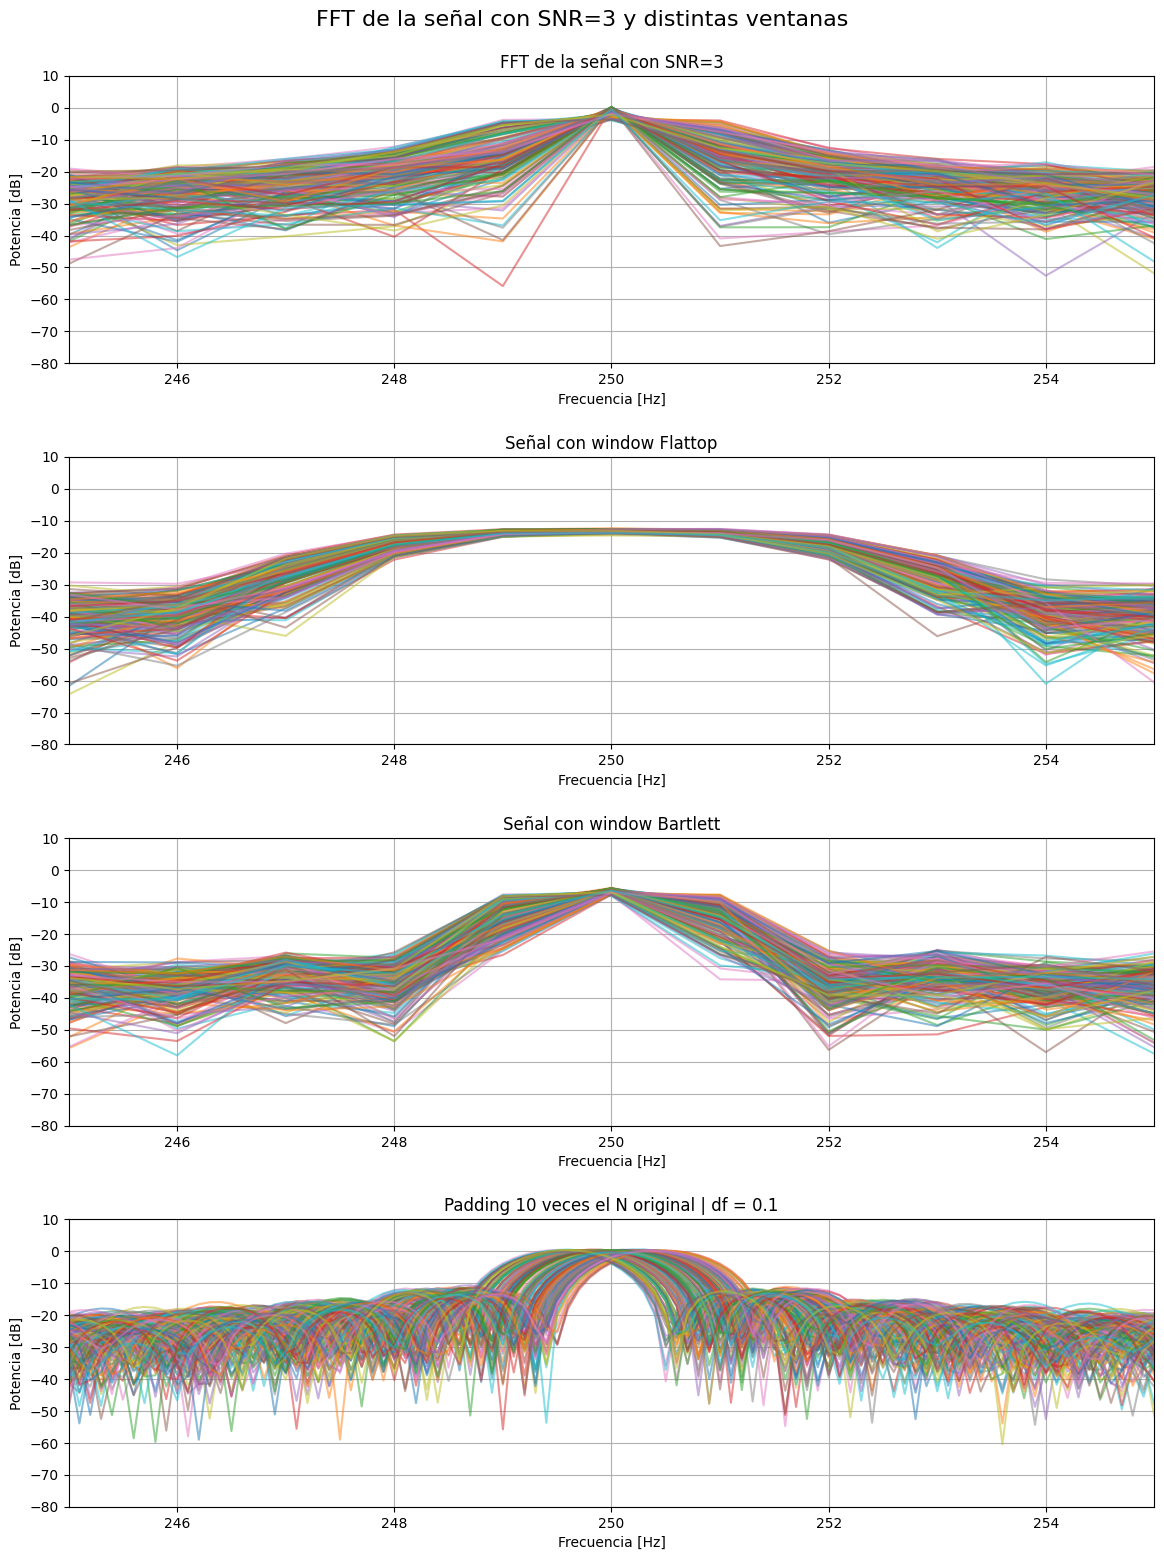

In [ ]:
#ploteo para snr=3 las 3 ventanas
plt.figure(figsize=(12, 16))
plt.subplot(4,1,1)
plot_freq(Xk_2_fft, ffx_2, repes, bfrec_2, f'FFT de la señal con SNR=3', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.xlim(fs/4 - 5, fs/4 + 5)
plt.ylim(-80, 10)
plt.subplot(4,1,2)
plot_freq(Xk_2_flattop_fft, ffx_2, repes, bfrec_2, 'Señal con window Flattop', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.xlim(fs/4 - 5, fs/4 + 5)
plt.ylim(-80, 10)
plt.subplot(4,1,3)
plot_freq(Xk_2_barlett_fft, ffx_2, repes, bfrec_2, 'Señal con window Bartlett', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.xlim(fs/4 - 5, fs/4 + 5)
plt.ylim(-80, 10)
plt.subplot(4,1,4)
plot_freq(Xk_2_fft_pad, ffx_2_pad, repes, bfrec_2_pad, f'Padding 10 veces el N original | df = {df_pad_3}', 'Frecuencia [Hz]', 'Potencia [dB]')
plt.xlim(fs/4 - 5, fs/4 + 5)
plt.ylim(-80, 10)
plt.suptitle(f'FFT de la señal con SNR=3 y distintas ventanas', fontsize=16)
plt.tight_layout( pad=2.0)
plt.show()

In [53]:
# para estimar w
Xk_2_fft_pad_implicita, ffx_2_pad_implicita, bfrec_2_pad_implicita, df_2_pad_implicita = gen_fft(xk_2,fs=fs, cte=N_pad_3)
Xk_2_flattop_fft_pad, ffx_2_pad_flattop, bfrec_2_pad_flattop, df_2_pad_flattop = gen_fft(xk_2_flattop,fs=fs, cte=N_pad_3)
Xk_2_barlett_fft_pad, ffx_2_pad_barlett, bfrec_2_pad_barlett, df_2_pad_barlett = gen_fft(xk_2_barlett,fs=fs, cte=N_pad_3)

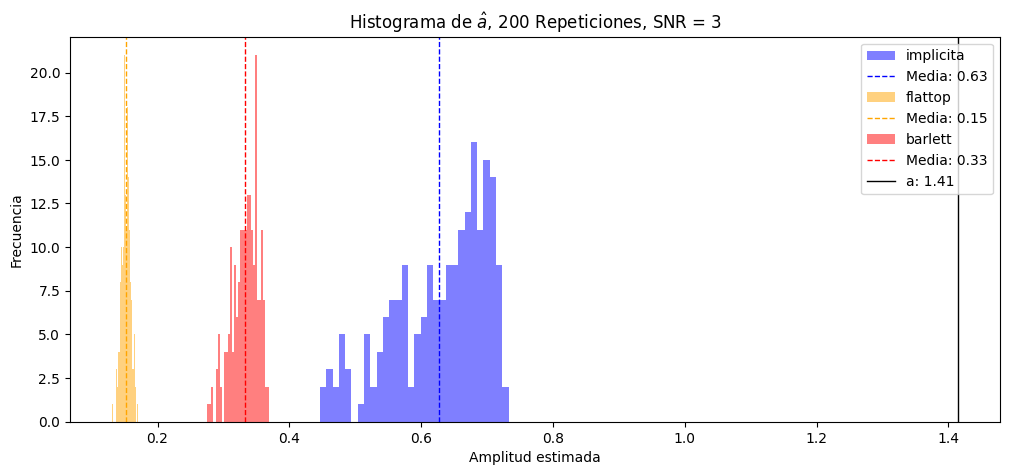

In [54]:
#estimador de a
a_implicita_2, a_implicita_media_2, a_implicita_var_2 = estimador_a(Xk_2_fft, f0)
a_flattop_2, a_flattop_media_2, a_flattop_var_2 = estimador_a(Xk_2_flattop_fft, f0)
a_barlett_2, a_barlett_media_2, a_barlett_var_2 = estimador_a(Xk_2_barlett_fft, f0)

plt.figure(figsize=(12, 5))
plt.hist(a_implicita_2,color = 'blue', bins=30, alpha=0.5, label='implicita')
plt.axvline(a_implicita_media_2, color='blue', linestyle='dashed', linewidth=1, label=f'Media: {a_implicita_media_2:.2f}')
plt.hist(a_flattop_2, color='orange', bins=30, alpha=0.5, label='flattop')
plt.axvline(a_flattop_media_2, color='orange', linestyle='dashed', linewidth=1, label=f'Media: {a_flattop_media_2:.2f}')
plt.hist(a_barlett_2, color='red', bins=30, alpha=0.5, label='barlett')
plt.axvline(a_barlett_media_2, color='red', linestyle='dashed', linewidth=1, label=f'Media: {a_barlett_media_2:.2f}')
plt.axvline(a1, color='black', linestyle='-', linewidth=1, label=f'a: {a1:.2f}')
plt.title(f'Histograma de $\\hat{{a}}$, {repes} Repeticiones, SNR = {SNR}')
plt.xlabel("Amplitud estimada")
plt.ylabel("Frecuencia")
plt.legend()

como mostre antes, con restar el sesgo se corrije

[]

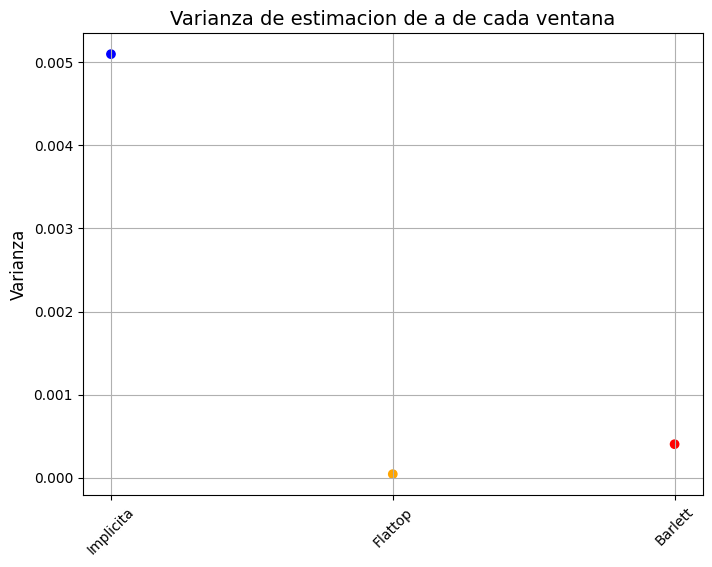

In [55]:
#ploteo scatter para ver varianzas
plt.figure(figsize=(8, 6))
varianzas = [a_implicita_var_2, a_flattop_var_2, a_barlett_var_2]
labels = ['Implicita', 'Flattop', 'Barlett']
plt.scatter(range(len(varianzas)), varianzas, color=['blue', 'orange', 'red'])
plt.xticks(range(len(varianzas)), labels, rotation=45, fontsize=10)
plt.title('Varianza de estimacion de a de cada ventana', fontsize=14)
plt.ylabel('Varianza', fontsize=12)
plt.grid(True)
plt.plot()
